# Understanding Random Forest

**Goal:**

1. Understand the usage of random forest classification
2. Understand how to see the key features of a data
3. Understand how to export the model from random forest

**Notes:** Data used is a 10 dimensional data, binary classification is to be performed


In [1]:
from sklearn.datasets import make_hastie_10_2

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_hastie_10_2(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.10, random_state=96
)

In [2]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=15, random_state=21, n_estimators=100)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, random_state=21)

## Check the accuracy of the model

In [24]:
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8816666666666667


## Key features

In [3]:
import pandas as pd
import numpy as np

features = pd.DataFrame({
    "feature": list(range(X.shape[1])),
    "importance": clf.feature_importances_
}).sort_values("importance", ascending=False)

features     

,feature,importance
0,0,0.109958
6,6,0.102846
1,1,0.102047
5,5,0.101833
7,7,0.101702
2,2,0.098691
4,4,0.098645
9,9,0.098345
8,8,0.095219
3,3,0.090714


<bound method Figure.tight_layout of <Figure size 432x288 with 1 Axes>>

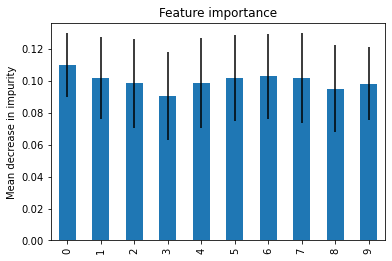

In [4]:
import matplotlib.pyplot as plt

importances= pd.Series(clf.feature_importances_, index=list(range(X.shape[1])))

std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

fig, ax = plt.subplots()
importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout


In [5]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=29, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=list(range(X.shape[1])))


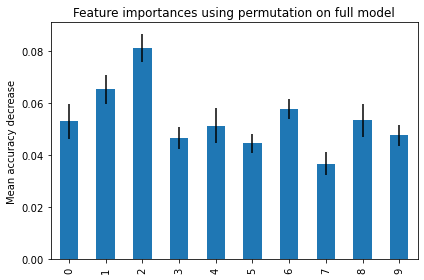

In [6]:
fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()

Following our analysis on feature importance using permutation, we can remove a feature and recreate the model

## Extracting model tree

The decision trees in the random forest can be extracted.


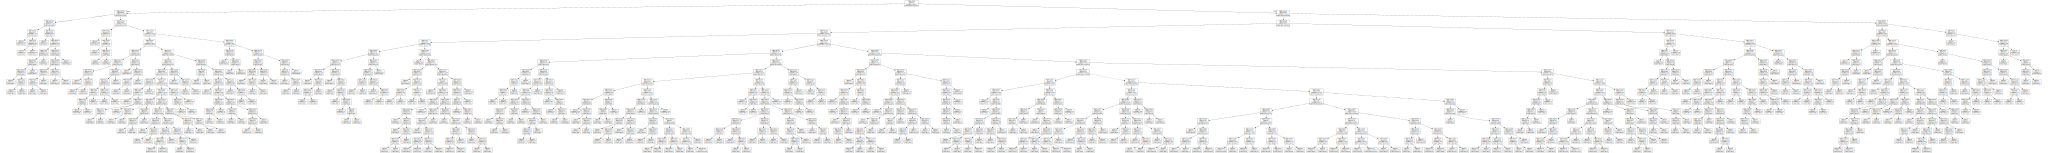

In [9]:
from sklearn import tree
from sklearn.tree import export_text
import graphviz 

# Extract the first tree in the forest
dot = tree.export_graphviz(clf.estimators_[0], out_file=None) 
graph = graphviz.Source(dot)
graph.render('iris')
